In [7]:
import requests
from bs4 import BeautifulSoup 

In [11]:
#한국수자원공사_SPI 가뭄지수정보
url = 'http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList?hjdCd=1168058000&stDt=20190501&edDt=20190531&numOfRows=10&pageNo=1&serviceKey=ArX9sgd4FI5nn9jffw2qK5jmWV%2F7VOJLySLOEr8CQejDGKJ%2BmuxAKhXHQKVgiir%2FJKLwu1xguRobsePfp%2BEy4A%3D%3D'


In [9]:
resp = requests.get(url)
resp

<Response [200]>

In [5]:
import urllib 

In [12]:
urllib.parse.urlparse(url)

ParseResult(scheme='http', netloc='apis.data.go.kr', path='/B500001/drghtIdexSpiAnals/analsInfoList', params='', query='hjdCd=1168058000&stDt=20190501&edDt=20190531&numOfRows=10&pageNo=1&serviceKey=ArX9sgd4FI5nn9jffw2qK5jmWV%2F7VOJLySLOEr8CQejDGKJ%2BmuxAKhXHQKVgiir%2FJKLwu1xguRobsePfp%2BEy4A%3D%3D', fragment='')

In [15]:
#디코딩후 요청을 보낼 때 
urllib.parse.unquote('ArX9sgd4FI5nn9jffw2qK5jmWV%2F7VOJLySLOEr8CQejDGKJ%2BmuxAKhXHQKVgiir%2FJKLwu1xguRobsePfp%2BEy4A%3D%3D')

'ArX9sgd4FI5nn9jffw2qK5jmWV/7VOJLySLOEr8CQejDGKJ+muxAKhXHQKVgiir/JKLwu1xguRobsePfp+Ey4A=='

In [39]:
print(resp.text)#response를 줄 때 실패! 잘못된것입니다~~

<OpenAPI_ServiceResponse>
	<cmmMsgHeader>
		<errMsg>SERVICE ERROR</errMsg>
		<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>
		<returnReasonCode>30</returnReasonCode>
	</cmmMsgHeader>
</OpenAPI_ServiceResponse>


In [16]:
params = {
    'hjdCd': '1168058000',
    'stDt': '20190501',
    'edDt':'20190531',
    'numOfRows':10,
    'pageNo':1,
    'servieceKey':'ArX9sgd4FI5nn9jffw2qK5jmWV/7VOJLySLOEr8CQejDGKJ+muxAKhXHQKVgiir/JKLwu1xguRobsePfp+Ey4A=='
}

In [17]:
resp = requests.get(url)
resp

<Response [200]>

In [18]:
resp.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.26</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.2</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrst>정상</anlrst><anlval>-0.55</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrs

In [20]:
soup = BeautifulSoup(resp.text, 'lxml')#xml parsing
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><html><body><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><items><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.26</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.2</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrst>정상</anlrst><anlval>-0.55</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><

In [22]:
header = soup.find('header')
body = soup.find('body')

In [23]:
result_code = header.find('resultcode').text
result_msg = header.find('resultmsg').text
result_code, result_msg

('00', 'NORMAL SERVICE.')

In [24]:
num_of_rows = body.find('numofrows').text
page_no = body.find('pageno').text
total_count= body.find('totalcount').text
num_of_rows, page_no, total_count

('10', '1', '62')

In [29]:
items = body.find_all('item')
items
result_list = []
for item in items:
    result_list.append({
        'anldt': item.find('anldt').text,
        'anlrst': item.find('anlrst').text,
        'anlval': item.find('anlval').text,
        'dv': item.find('dv').text,
        'hjdcd':item.find('hjdcd').text
    })
    
result_list

[{'anldt': '20190501',
  'anlrst': '정상',
  'anlval': '-0.18',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190501',
  'anlrst': '정상',
  'anlval': '-0.21',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190502',
  'anlrst': '정상',
  'anlval': '-0.21',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190502',
  'anlrst': '정상',
  'anlval': '-0.18',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190503',
  'anlrst': '정상',
  'anlval': '-0.26',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190503',
  'anlrst': '정상',
  'anlval': '-0.2',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190504',
  'anlrst': '정상',
  'anlval': '-0.55',
  'dv': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190504',
  'anlrst': '정상',
  'anlval': '-0.2',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190505',
  'anlrst': '정상',
  'anlval': '-0.2',
  'dv': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190505',
  'anlrst': '정상',
  'anlval': '-0.57',
  'dv

In [102]:
import datetime
now = datetime.datetime.now()
today=now.strftime('%Y%m%d')
today

'20200806'

In [116]:
url = 'http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList?hjdCd=1168058000&stDt=20190501&edDt=20190531&numOfRows=10&pageNo=1&serviceKey=ArX9sgd4FI5nn9jffw2qK5jmWV%2F7VOJLySLOEr8CQejDGKJ%2BmuxAKhXHQKVgiir%2FJKLwu1xguRobsePfp%2BEy4A%3D%3D'

params = {
    'hjdCd': '1168058000',
    'stDt': '20130501',
    'edDt':today,
    'numOfRows':1000000,
    'pageNo':1,
    'servieceKey':'ArX9sgd4FI5nn9jffw2qK5jmWV/7VOJLySLOEr8CQejDGKJ+muxAKhXHQKVgiir/JKLwu1xguRobsePfp+Ey4A==',
    '_type':'json'
}


resp = requests.get(url, params=params)
resp
resp.text

'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL SERVICE."},"body":{"items":{"item":[{"anldt":20190501,"anlrst":"정상","anlval":-0.18,"dv":"SPI6","hjdcd":1168058000},{"anldt":20190501,"anlrst":"정상","anlval":-0.21,"dv":"SPI3","hjdcd":1168058000},{"anldt":20190502,"anlrst":"정상","anlval":-0.21,"dv":"SPI3","hjdcd":1168058000},{"anldt":20190502,"anlrst":"정상","anlval":-0.18,"dv":"SPI6","hjdcd":1168058000},{"anldt":20190503,"anlrst":"정상","anlval":-0.26,"dv":"SPI3","hjdcd":1168058000},{"anldt":20190503,"anlrst":"정상","anlval":-0.2,"dv":"SPI6","hjdcd":1168058000},{"anldt":20190504,"anlrst":"정상","anlval":-0.55,"dv":"SPI3","hjdcd":1168058000},{"anldt":20190504,"anlrst":"정상","anlval":-0.2,"dv":"SPI6","hjdcd":1168058000},{"anldt":20190505,"anlrst":"정상","anlval":-0.2,"dv":"SPI6","hjdcd":1168058000},{"anldt":20190505,"anlrst":"정상","anlval":-0.57,"dv":"SPI3","hjdcd":1168058000}]},"numOfRows":10,"pageNo":1,"totalCount":62}}}'

In [117]:
import json
data = resp.json()
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'anldt': 20190501,
      'anlrst': '정상',
      'anlval': -0.18,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20190501,
      'anlrst': '정상',
      'anlval': -0.21,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20190502,
      'anlrst': '정상',
      'anlval': -0.21,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20190502,
      'anlrst': '정상',
      'anlval': -0.18,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20190503,
      'anlrst': '정상',
      'anlval': -0.26,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20190503,
      'anlrst': '정상',
      'anlval': -0.2,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20190504,
      'anlrst': '정상',
      'anlval': -0.55,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20190504,
      'anlrst': '정상',
      'anlval': -0.2,
   

In [43]:
import pandas as pd

In [118]:
data.keys()

dict_keys(['response'])

In [119]:
items = data['response']['body']['items']['item']

In [120]:
dright_idx = pd.DataFrame(items)
dright_idx.head()

,anldt,anlrst,anlval,dv,hjdcd
0,20190501,정상,-0.18,SPI6,1168058000
1,20190501,정상,-0.21,SPI3,1168058000
2,20190502,정상,-0.21,SPI3,1168058000
3,20190502,정상,-0.18,SPI6,1168058000
4,20190503,정상,-0.26,SPI3,1168058000


In [121]:
dright_idx.describe()

,anldt,anlval,hjdcd
count,1.000000e+01,10.000000,1.000000e+01
mean,2.019050e+07,-0.276000,1.168058e+09
std,1.490712e+00,0.151379,0.000000e+00
min,2.019050e+07,-0.570000,1.168058e+09
25%,2.019050e+07,-0.247500,1.168058e+09
50%,2.019050e+07,-0.205000,1.168058e+09
75%,2.019050e+07,-0.200000,1.168058e+09
max,2.019050e+07,-0.180000,1.168058e+09


In [122]:
dright_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   anldt   10 non-null     int64  
 1   anlrst  10 non-null     object 
 2   anlval  10 non-null     float64
 3   dv      10 non-null     object 
 4   hjdcd   10 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


In [123]:
import numpy as np

In [124]:
dright_idx['anlval'].astype(np.float64)
dright_idx.describe()

,anldt,anlval,hjdcd
count,1.000000e+01,10.000000,1.000000e+01
mean,2.019050e+07,-0.276000,1.168058e+09
std,1.490712e+00,0.151379,0.000000e+00
min,2.019050e+07,-0.570000,1.168058e+09
25%,2.019050e+07,-0.247500,1.168058e+09
50%,2.019050e+07,-0.205000,1.168058e+09
75%,2.019050e+07,-0.200000,1.168058e+09
max,2.019050e+07,-0.180000,1.168058e+09


In [68]:
import matplotlib.pyplot as plt

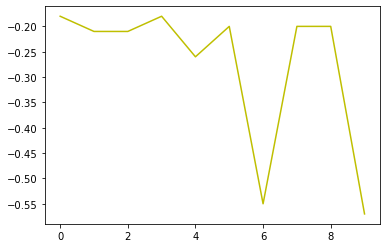

In [125]:
plt.plot(dright_idx['anlval'],'y')

(array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 5., 2.]),
 array([-0.57  , -0.5505, -0.531 , -0.5115, -0.492 , -0.4725, -0.453 ,
        -0.4335, -0.414 , -0.3945, -0.375 , -0.3555, -0.336 , -0.3165,
        -0.297 , -0.2775, -0.258 , -0.2385, -0.219 , -0.1995, -0.18  ]),
 <a list of 20 Patch objects>)

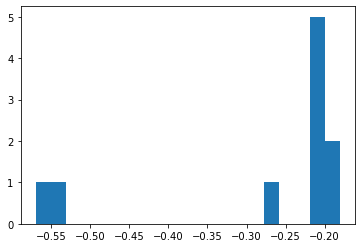

In [112]:
plt.hist(dright_idx['anlval'], bins=20)

In [113]:
dright_idx['anlrst'].value_counts().index, dright_idx['anlrst']

(Index(['정상'], dtype='object'),
 0    정상
 1    정상
 2    정상
 3    정상
 4    정상
 5    정상
 6    정상
 7    정상
 8    정상
 9    정상
 Name: anlrst, dtype: object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)


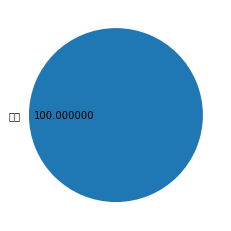

In [114]:
plt.pie(dright_idx['anlrst'].value_counts(),labels = dright_idx['anlrst'].value_counts().index, autopct = '%2f')
plt.show()

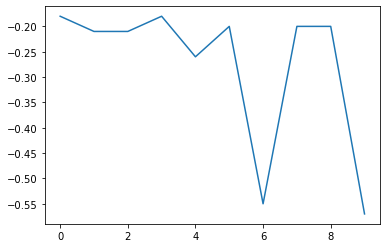

In [115]:
dright_idx['anlval'].plot()

# 네이버 POST 요청(데이터랩)

In [16]:
url = 'https://openapi.naver.com/v1/datalab/search'
headers = {
    'X-Naver-Client-Id': 'AK99EURfyVEshQlsXwfh',
    'X-Naver-Client-Secret': '8AzaOwR26v',
    'Content-Type': 'application/json'
}

params = {
    'startDate' :'2019-08-03',
    'endDate':'2020-08-03',
    'timeUnit': 'date',
    'keywordGroups': [#list요소가 dic
        {
            'groupName': '코로나',
            'keywords': ['코로나 현황', '코로나', '코로나 확산']
        }, 
        {
            'groupName': '마스크',
            'keywords': ['마스크', '공적마스크', 'kf80', 'kf94']
        }
        
    ]
    
}


In [17]:
import json

 만약 data를 xml로 만들어서 보내야할 경우
dicttoxml라이브러리 설치 및 import하여 사용.(상세내용 문서 참조)
혹은 구글 검색(how wo convert dict to xml in python)



In [35]:
data = json.dumps(params)
data

'{"serviceKey": "ArX9sgd4FI5nn9jffw2qK5jmWV%2F7VOJLySLOEr8CQejDGKJ%2BmuxAKhXHQKVgiir%2FJKLwu1xguRobsePfp%2BEy4A%3D%3D", "numOfRows": 10, "pageNo": 1, "hjdCd": 1168058000, "stDt": 20190501, "edDt": 20190531, "resultType": "json"}'

In [30]:
requests.post

<function requests.api.post(url, data=None, json=None, **kwargs)>

In [31]:
requests.put

<function requests.api.put(url, data=None, **kwargs)>

In [34]:
requests.delete

<function requests.api.delete(url, **kwargs)>

In [21]:
resp = requests.post(url, headers=headers, data = data)
resp

<Response [200]>

In [22]:
resp.text

'{"startDate":"2019-08-03","endDate":"2020-08-03","timeUnit":"date","results":[{"title":"코로나","keywords":["코로나 현황","코로나","코로나 확산"],"data":[{"period":"2019-08-03","ratio":0.00491},{"period":"2019-08-04","ratio":0.00478},{"period":"2019-08-05","ratio":0.00555},{"period":"2019-08-06","ratio":0.00482},{"period":"2019-08-07","ratio":0.00493},{"period":"2019-08-08","ratio":0.00483},{"period":"2019-08-09","ratio":0.00482},{"period":"2019-08-10","ratio":0.00528},{"period":"2019-08-11","ratio":0.00481},{"period":"2019-08-12","ratio":0.00486},{"period":"2019-08-13","ratio":0.0053},{"period":"2019-08-14","ratio":0.00523},{"period":"2019-08-15","ratio":0.00557},{"period":"2019-08-16","ratio":0.00473},{"period":"2019-08-17","ratio":0.00502},{"period":"2019-08-18","ratio":0.00529},{"period":"2019-08-19","ratio":0.00494},{"period":"2019-08-20","ratio":0.00513},{"period":"2019-08-21","ratio":0.00458},{"period":"2019-08-22","ratio":0.00472},{"period":"2019-08-23","ratio":0.0044},{"period":"2019-08-24",

In [23]:
result = resp.json()

In [24]:
result

{'startDate': '2019-08-03',
 'endDate': '2020-08-03',
 'timeUnit': 'date',
 'results': [{'title': '코로나',
   'keywords': ['코로나 현황', '코로나', '코로나 확산'],
   'data': [{'period': '2019-08-03', 'ratio': 0.00491},
    {'period': '2019-08-04', 'ratio': 0.00478},
    {'period': '2019-08-05', 'ratio': 0.00555},
    {'period': '2019-08-06', 'ratio': 0.00482},
    {'period': '2019-08-07', 'ratio': 0.00493},
    {'period': '2019-08-08', 'ratio': 0.00483},
    {'period': '2019-08-09', 'ratio': 0.00482},
    {'period': '2019-08-10', 'ratio': 0.00528},
    {'period': '2019-08-11', 'ratio': 0.00481},
    {'period': '2019-08-12', 'ratio': 0.00486},
    {'period': '2019-08-13', 'ratio': 0.0053},
    {'period': '2019-08-14', 'ratio': 0.00523},
    {'period': '2019-08-15', 'ratio': 0.00557},
    {'period': '2019-08-16', 'ratio': 0.00473},
    {'period': '2019-08-17', 'ratio': 0.00502},
    {'period': '2019-08-18', 'ratio': 0.00529},
    {'period': '2019-08-19', 'ratio': 0.00494},
    {'period': '2019-08-20',